- clustering
- metric learning
- random forest distribution
- categorical clustering


[Dataset](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq)
Cancer RNA sequence dataset

In [1]:
import pandas as pd
import os

In [2]:
features = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=0)
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0)

In [3]:
features.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [4]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


In [5]:
labels.describe()

,Class
count,801
unique,5
top,BRCA
freq,300


In [6]:
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=10)
pca.fit(features.values)

PCA(n_components=10)

In [29]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.1583855 , 0.1050396 , 0.09472221, 0.06500803, 0.03615618,
        0.02972667, 0.02657142, 0.01562731, 0.01407073, 0.01226872]),
 0.5575763814192575)

In [16]:
pca_reduced = pca.fit_transform(features.values)

In [17]:
pca_reduced.shape

(801, 10)

In [18]:
data = StandardScaler().fit_transform(features.values)

In [19]:
reducer = umap.UMAP()

In [20]:
embedding = reducer.fit_transform(data)

In [21]:
micro_embedding = reducer.fit_transform(pca_reduced)

In [22]:
embedding.shape, micro_embedding.shape

((801, 2), (801, 2))

In [26]:
def draw_umap(data, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)

/home/cayler/envs/autogluon/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


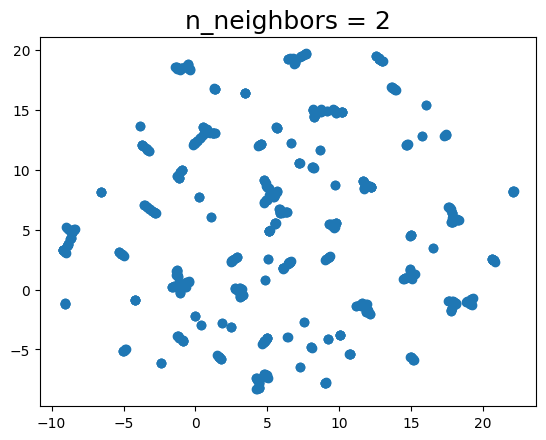

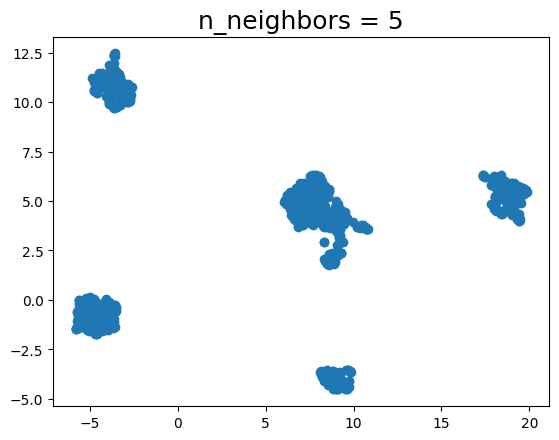

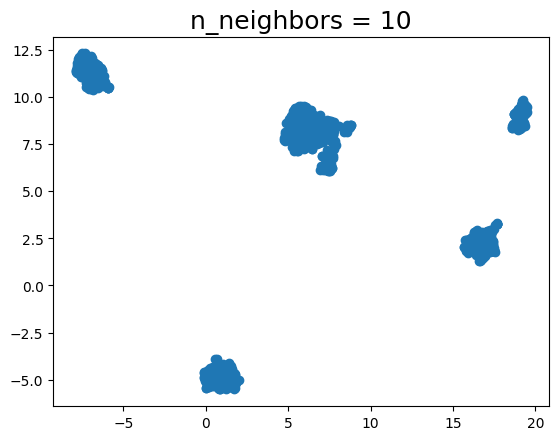

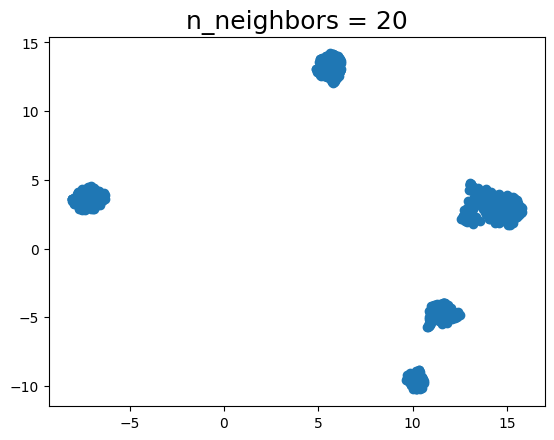

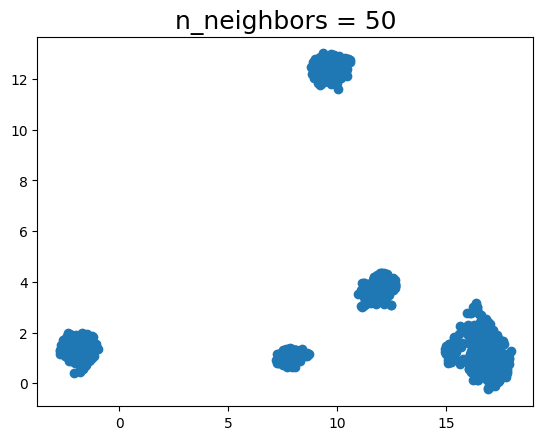

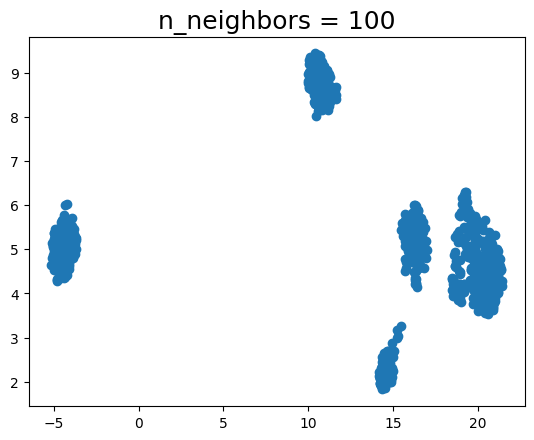

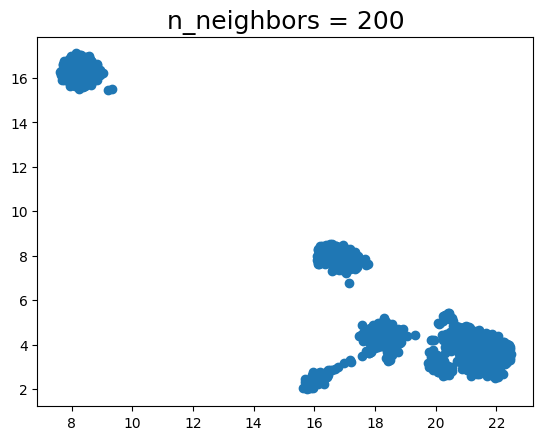

In [27]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(data, n_neighbors=n, title='n_neighbors = {}'.format(n))

/home/cayler/envs/autogluon/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


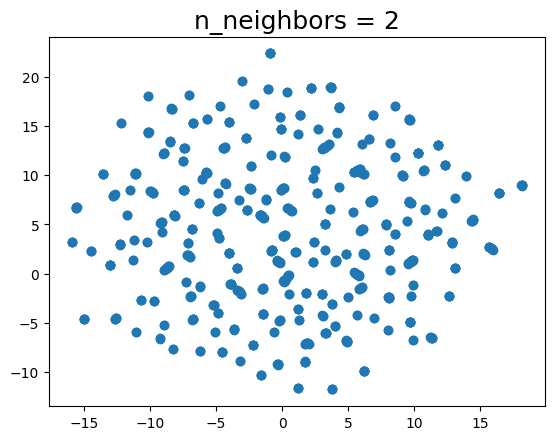

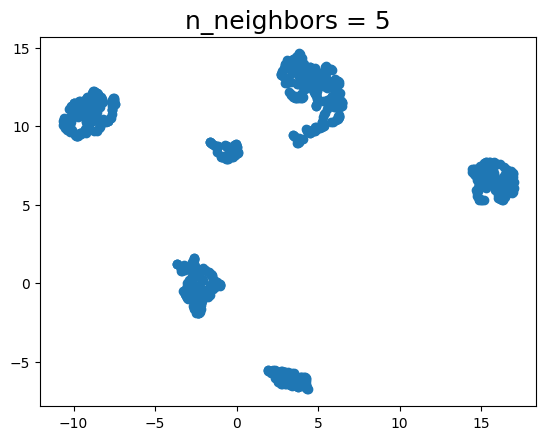

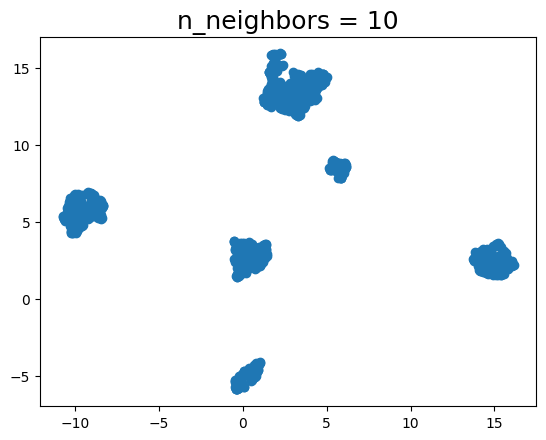

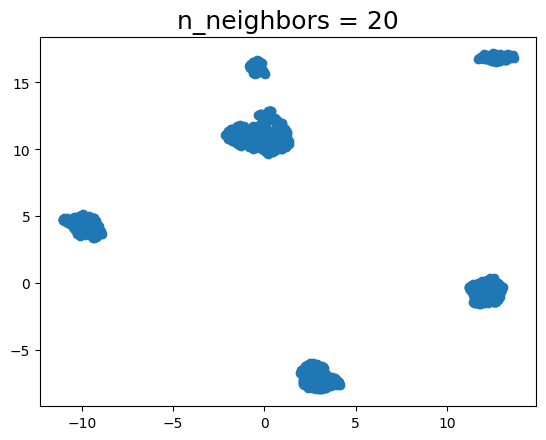

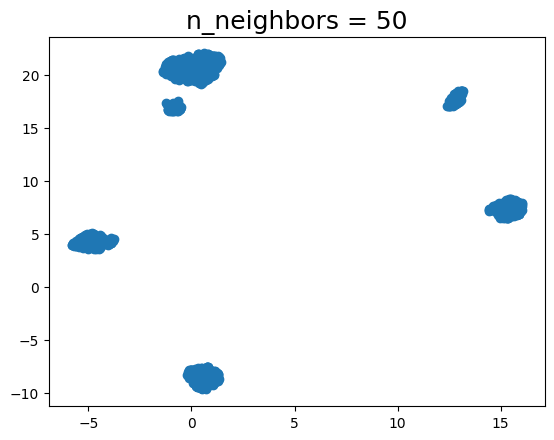

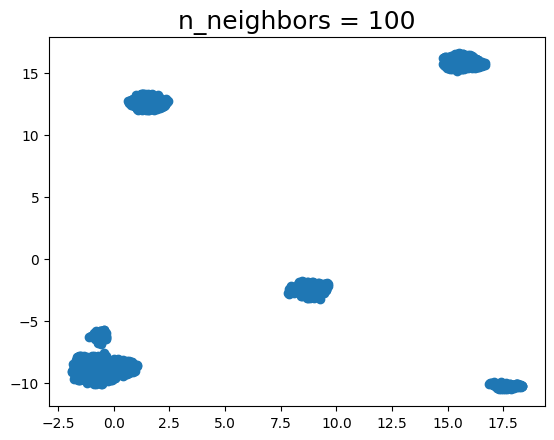

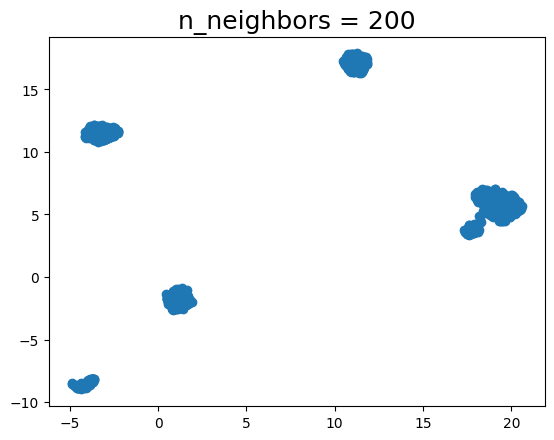

In [28]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(pca_reduced, n_neighbors=n, title='n_neighbors = {}'.format(n))

Some TODO analysis...
- Identify 6th cluster
- Plot colored plot with labels (I don't want to use labels for training though, only validation)
- Attempt implementing [generalized random forests](https://grf-labs.github.io/grf/) for clustering.